In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import label_binarize
import sklearn
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score

In [2]:
df=pd.read_csv('/Users/kevinc/Library/Mobile Documents/com~apple~CloudDocs/Data Science/F21DL Data Mining Machine Learning/F21SC CW/datascience.csv')

In [3]:
Location_US= df["company_location"]=="US"
df["Location"]=Location_US
df.drop(['company_location'], axis=1)
df.drop(columns=df.columns[0],axis=1,inplace=True)
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,False
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,False
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,False
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,False
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,True
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,True
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,True
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,True
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,True


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df['work_year']=le.fit_transform(df['work_year'])
df['Location']=le.fit_transform(df['Location'])
df['employee_residence']=le.fit_transform(df['employee_residence'])
df['salary_currency']=le.fit_transform(df['salary_currency'])
df['employment_type']=le.fit_transform(df['employment_type'])
df['experience_level']=le.fit_transform(df['experience_level'])
df['job_title']=le.fit_transform(df['job_title'])
df['company_location']=le.fit_transform(df['company_location'])
df['company_size']=le.fit_transform(df['company_size'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           607 non-null    int64
 1   experience_level    607 non-null    int64
 2   employment_type     607 non-null    int64
 3   job_title           607 non-null    int64
 4   salary              607 non-null    int64
 5   salary_currency     607 non-null    int64
 6   salary_in_usd       607 non-null    int64
 7   employee_residence  607 non-null    int64
 8   remote_ratio        607 non-null    int64
 9   company_location    607 non-null    int64
 10  company_size        607 non-null    int64
 11  Location            607 non-null    int64
dtypes: int64(12)
memory usage: 57.0 KB


In [6]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
0,0,2,2,22,70000,7,79833,14,0,12,0,0
1,0,3,2,41,260000,16,260000,32,0,29,2,0
2,0,3,2,7,85000,8,109024,20,50,18,1,0
3,0,2,2,47,20000,16,20000,23,0,20,2,0
4,0,3,2,38,150000,16,150000,55,50,48,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2,3,2,17,154000,16,154000,55,100,48,1,1
603,2,3,2,17,126000,16,126000,55,100,48,1,1
604,2,3,2,12,129000,16,129000,55,0,48,1,1
605,2,3,2,12,150000,16,150000,55,100,48,1,1


In [7]:

df1=df[["Location","employee_residence","salary_currency","salary_in_usd","experience_level", "remote_ratio","company_size","salary","employment_type", "job_title"  ]]
df2=df[["Location","employee_residence","salary_currency","salary_in_usd","experience_level", "remote_ratio"]]
df3=df[["Location","employee_residence","salary_currency","salary_in_usd"]]

In [8]:

df=df[["experience_level","job_title",'employee_residence','company_location']]

In [9]:
X=df.drop(['company_location'], axis=1)
y=df['company_location']

max_depth=20  <- sent the depth it will go

In [10]:
tree_clf = DecisionTreeClassifier( random_state=36)
tree_clf.fit(X, y)

DecisionTreeClassifier(random_state=36)

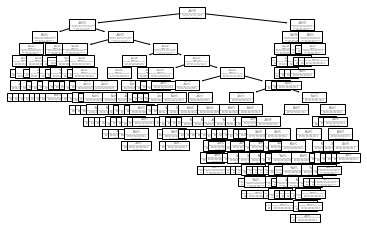

In [11]:
plot_tree(tree_clf);

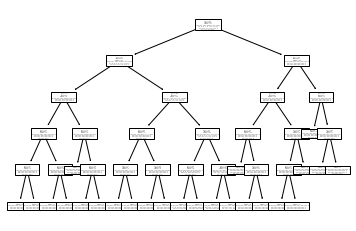

In [12]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=36)
tree_clf.fit(X, y)
plot_tree(tree_clf);

In [13]:
df=df[["job_title",'employee_residence','company_location']]
X=df.drop(['company_location'], axis=1)
y=df['company_location']

In [14]:
tree_clf = DecisionTreeClassifier(random_state=36)
tree_clf.fit(X, y)

DecisionTreeClassifier(random_state=36)

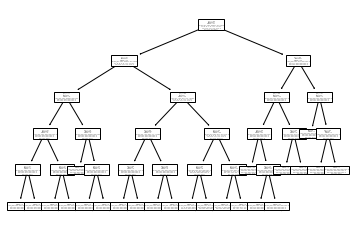

In [15]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=36)
tree_clf.fit(X, y)
plot_tree(tree_clf);

In [16]:
tree_clf.predict_proba([[22, 55]])

/Users/kevinc/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.]])

In [17]:
df=pd.read_csv('/Users/kevinc/Downloads/strokedata.csv')

In [18]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [20]:
df.dropna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [22]:
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df.dropna(inplace=True)


In [23]:
#X=df.drop(['stroke'], axis=1)
X=df[["gender","hypertension","bmi"]]
#X=df[["gender","bmi"]]

y=df['stroke']

In [24]:

X

,gender,hypertension,bmi
0,1,0,36.6
2,1,0,32.5
3,0,0,34.4
4,0,1,24.0
5,1,0,29.0
...,...,...,...
5104,0,0,18.6
5106,0,0,40.0
5107,0,0,30.6
5108,1,0,25.6


In [25]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [26]:
tree_clf = DecisionTreeClassifier (max_depth=10,random_state=36)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=36)

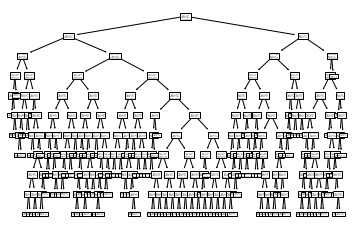

In [27]:
plot_tree(tree_clf);

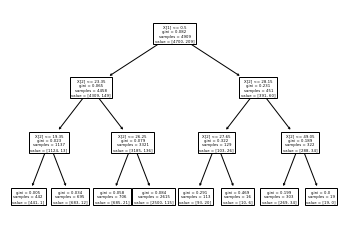

In [28]:
tree_clf = DecisionTreeClassifier (max_depth=3,random_state=36)
tree_clf.fit(X, y)
plot_tree(tree_clf);

In [29]:
tree_clf.predict_proba([[1,1,35]])

/Users/kevinc/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.88778878, 0.11221122]])

In [30]:
y_pred = tree_clf.predict(X_test)
print ("Decision Tree Accuracy",accuracy_score(y_test,y_pred))

Decision Tree Accuracy 0.9585879158180584


<AxesSubplot:>

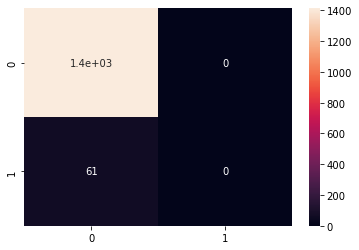

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

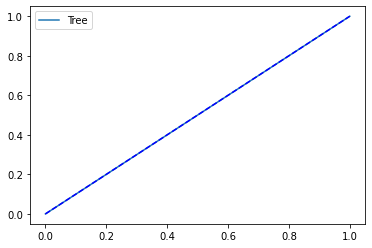

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Tree' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

In [33]:
cm = confusion_matrix(y_test, y_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(y_pred, y_test))
print('recall = ', recall_score(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
1412 0 0 61
sensitivity = 0.9585879158180584
specificity = nan
precision = 0.0
recall =  0.0
AUC: 0.500


/var/folders/kk/hvcgd7qj26n4sxbj_m33lz340000gn/T/ipykernel_5557/1887941644.py:7: RuntimeWarning: invalid value encountered in long_scalars
  print('specificity =' ,(tn / (tn+fp)))
/Users/kevinc/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

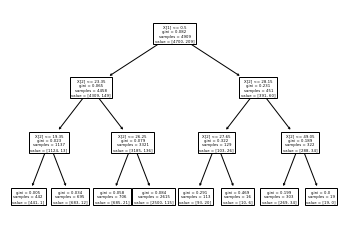

In [35]:
tree_clf = DecisionTreeClassifier (criterion="gini", max_depth=3,random_state=36)
tree_clf.fit(X, y)
plot_tree(tree_clf);
plt.savefig('gini.pdf')

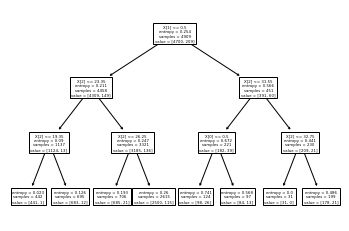

In [36]:
tree_clf = DecisionTreeClassifier (criterion="entropy", max_depth=3,random_state=36)
tree_clf.fit(X, y)
plot_tree(tree_clf);
plt.savefig('entropy.pdf')

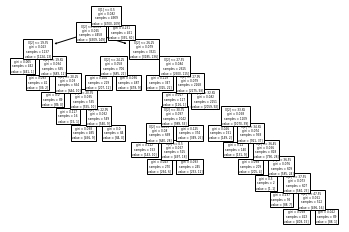

In [37]:
#Minium number of sample required to be at a leaf node -min_samples_leaf
#min_samples_split - min number of sample to split an internal node
#max_features - max number of features
#class_weight - 
tree_clf = DecisionTreeClassifier (min_samples_split=500,criterion="gini",random_state=36)
tree_clf.fit(X, y)
plot_tree(tree_clf);
plt.savefig('min.pdf')

In [38]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(DecisionTreeClassifier(),{
    'criterion':['gini','entropy'],
    
},cv=5,return_train_score=False)

In [39]:
clf.fit(X,y)
clf.cv_results_

{'mean_fit_time': array([0.00317993, 0.00314465]),
 'std_fit_time': array([0.00016456, 0.00021553]),
 'mean_score_time': array([0.00092206, 0.00073943]),
 'std_score_time': array([1.54256460e-04, 5.41569469e-05]),
 'param_criterion': masked_array(data=['gini', 'entropy'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}],
 'split0_test_score': array([0.95417515, 0.95417515]),
 'split1_test_score': array([0.95315682, 0.95417515]),
 'split2_test_score': array([0.94704684, 0.94704684]),
 'split3_test_score': array([0.95010183, 0.95010183]),
 'split4_test_score': array([0.95310907, 0.95310907]),
 'mean_test_score': array([0.95151794, 0.95172161]),
 'std_test_score': array([0.00261819, 0.00277279]),
 'rank_test_score': array([2, 1], dtype=int32)}

In [40]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003180,0.000165,0.000922,0.000154,gini,{'criterion': 'gini'},0.954175,0.953157,0.947047,0.950102,0.953109,0.951518,0.002618,2
1,0.003145,0.000216,0.000739,0.000054,entropy,{'criterion': 'entropy'},0.954175,0.954175,0.947047,0.950102,0.953109,0.951722,0.002773,1


In [41]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'inverse_transform',
 'multim

In [42]:
clf.best_params_

{'criterion': 'entropy'}

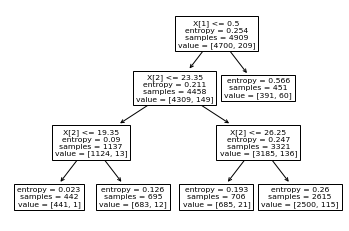

In [43]:
tree_clf = DecisionTreeClassifier (min_samples_split=500,criterion="entropy",random_state=36,max_depth=3)
tree_clf.fit(X, y)
plot_tree(tree_clf);
plt.savefig('entropy.pdf')

In [44]:
y_pred = tree_clf.predict(X_test)
print ("Decision Tree Accuracy",accuracy_score(y_test,y_pred))

Decision Tree Accuracy 0.9585879158180584


In [45]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=20)

In [46]:
tree_clf = DecisionTreeClassifier (min_samples_split=500,criterion="entropy",random_state=36,max_depth=3)
tree_clf.fit(X, y)
y_pred = tree_clf.predict(X_test)
print ("Decision Tree Accuracy",accuracy_score(y_test,y_pred))

Decision Tree Accuracy 0.9572301425661914


In [47]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.6, random_state=20)

In [48]:
tree_clf = DecisionTreeClassifier (min_samples_split=500,criterion="entropy",random_state=36,max_depth=3)
tree_clf.fit(X, y)
y_pred = tree_clf.predict(X_test)
print ("Decision Tree Accuracy",accuracy_score(y_test,y_pred))

Decision Tree Accuracy 0.9582484725050916


In [49]:
rfc=RandomForestClassifier(min_samples_split=500,criterion="entropy",random_state=36,max_depth=3)
rfc.fit(X, y)
y_pred = rfc.predict(X_test)
print ("random",accuracy_score(y_test,y_pred))

random 0.9582484725050916


In [50]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=20)

In [51]:
rfc=RandomForestClassifier(min_samples_split=500,criterion="entropy",random_state=36,max_depth=3)
rfc.fit(X, y)
y_pred = tree_clf.predict(X_test)
print ("random",accuracy_score(y_test,y_pred))

random 0.9572301425661914


In [52]:
df=pd.read_csv('/Users/kevinc/Downloads/strokedata.csv')

In [53]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [54]:
df.dropna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [55]:
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])






In [56]:
X=df[["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"]]


y=df['stroke']

In [57]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)

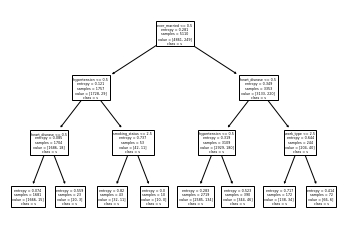

In [58]:
tree_clf = DecisionTreeClassifier (criterion="entropy",random_state=36,max_depth=3)
tree_clf.fit(X, y)
plot_tree(tree_clf,feature_names=("gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"),
          class_names="stroke",);
plt.savefig('new_entropy.pdf')


In [59]:
y_pred = tree_clf.predict(X_test)
print ("Decision Tree Accuracy",accuracy_score(y_test,y_pred))

Decision Tree Accuracy 0.9510763209393346


In [60]:
rfc=RandomForestClassifier(criterion="gini",random_state=36,max_depth=3)
rfc.fit(X, y)
y_pred = rfc.predict(X_test)
print ("random",accuracy_score(y_test,y_pred))


random 0.9510763209393346


In [61]:
from sklearn.tree import export_graphviz

In [62]:
estimator=rfc.estimators_[5]

In [63]:
export_graphviz(estimator, out_file="tree.dot",
rounded=True)

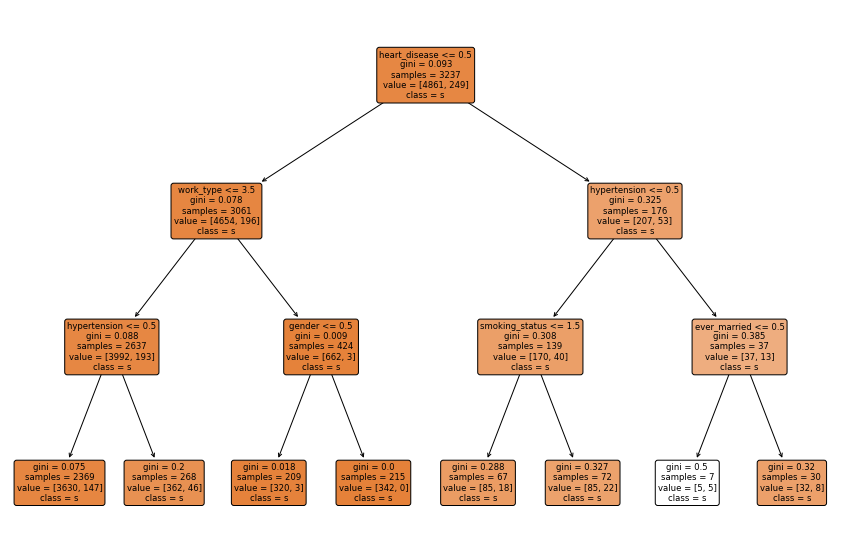

In [64]:
fig = plt.figure(figsize=(15, 10))
plot_tree(rfc.estimators_[0], 
          feature_names=("gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"),
          class_names="stroke",
          filled=True, impurity=True, 
          rounded=True)
plt.savefig('rfc.pdf')


In [123]:
df1=df[['age','bmi','avg_glucose_level']].dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4909 non-null   float64
 1   bmi                4909 non-null   float64
 2   avg_glucose_level  4909 non-null   float64
dtypes: float64(3)
memory usage: 153.4 KB


In [133]:
X=df1[['age']]
y=df1["bmi"]


In [134]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)

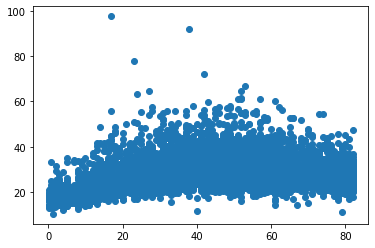

In [135]:
plt.scatter(X,y)

In [131]:
from sklearn import linear_model

In [136]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

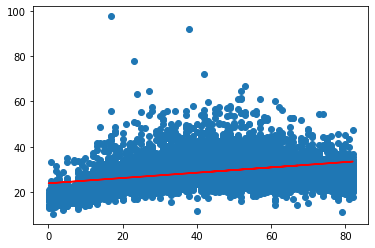

In [142]:
plt.scatter(X,y)
plt.plot(df['age'],reg.predict(df[['age']]),color='red')

In [143]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(23.916792682807497, array([0.11609474]))

In [ ]:
eta=0.1 #learning rate
n_iterations=1000
m=100 #batch size

theta=np.random.randn(2.1)